### NAME : SHAHRUKH ALI 
### PROJECT : FLOWER DETECTOR

In this notebook, we are using OxFord 102 flower dataset is to build a model to recognize and classify type of flowers in pictures. Fastai based on pytorch is a library to make the pipelining activities easy. So, I am using fastai library for this project to perform loading and learning thus importing fastai. 

In [2]:
#hide
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')


if iskaggle:
    %pip install -Uqq fastai ipywidgets gradio


The Oxford dataset consists of 102 varieties of flowers represented in 8,189 images. The train and validation set files each include a catalog of image file names along with their respective number indices. At this import step, to designate images files for training or validation, `pandas dataframe` will be utilized. However, since the flower names corresponding to the indices are not available, the indices will be used directly for image classification.

In [2]:
pip install fastai


Note: you may need to restart the kernel to use updated packages.


In [3]:
#hide
from fastai.vision.all import *
import pandas as pd


c:\Users\wiz tech\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading the data

The fastai library provides a URLs module with a pre-specified URL for the flower dataset. We will download and extract the dataset using this module and confirm the contents of the folder by running the "ls" command. The folder should show a "jpg" folder along with "test.txt", "valid.txt" and "train.txt" files.

In [4]:
path = untar_data(URLs.FLOWERS)

path.ls()

(#4) [Path('C:/Users/wiz tech/.fastai/data/oxford-102-flowers/jpg'),Path('C:/Users/wiz tech/.fastai/data/oxford-102-flowers/test.txt'),Path('C:/Users/wiz tech/.fastai/data/oxford-102-flowers/train.txt'),Path('C:/Users/wiz tech/.fastai/data/oxford-102-flowers/valid.txt')]

In order to make the output more user-friendly, we load a mapping file that associates each index in our dataset with its corresponding flower name. This allows us to create a dictionary file that can be used to interpret the index information and display the flower names in our results.

In [5]:
flower_df = pd.read_csv('oxford_flower_102_name.csv', header=0)

flower_index_dict = flower_df.set_index('Index').to_dict()['Name']
print(flower_index_dict)

{0: 'pink primrose', 1: 'hard-leaved pocket orchid', 2: 'canterbury bells', 3: 'sweet pea', 4: 'english marigold', 5: 'tiger lily', 6: 'moon orchid', 7: 'bird of paradise', 8: 'monkshood', 9: 'globe thistle', 10: 'snapdragon', 11: "colt's foot", 12: 'king protea', 13: 'spear thistle', 14: 'yellow iris', 15: 'globe-flower', 16: 'purple coneflower', 17: 'peruvian lily', 18: 'balloon flower', 19: 'giant white arum lily', 20: 'fire lily', 21: 'pincushion flower', 22: 'fritillary', 23: 'red ginger', 24: 'grape hyacinth', 25: 'corn poppy', 26: 'prince of wales feathers', 27: 'stemless gentian', 28: 'artichoke', 29: 'sweet william', 30: 'carnation', 31: 'garden phlox', 32: 'love in the mist', 33: 'mexican aster', 34: 'alpine sea holly', 35: 'ruby-lipped cattleya', 36: 'cape flower', 37: 'great masterwort', 38: 'siam tulip', 39: 'lenten rose', 40: 'barbeton daisy', 41: 'daffodil', 42: 'sword lily', 43: 'poinsettia', 44: 'bolero deep blue', 45: 'wallflower', 46: 'marigold', 47: 'buttercup', 48:

To load the `train.txt` file, we are using the pandas.read_csv function. This reads the file name and corresponding index, which is then loaded to a dataframe. We are adding an "is_valid" column to the dataframe to indicate whether each file will be used for training or validation process. Using the dictionary for flower name, we are adding "label" column.

In [6]:

df = pd.read_csv(f'{path}/train.txt',sep=' ',names = ['fname','index'])
df['is_valid'] = False
df['label'] = df['index'].map(flower_index_dict)

print(df.shape)

df.head()

(1020, 4)


,fname,index,is_valid,label
0,jpg/image_03860.jpg,16,False,purple coneflower
1,jpg/image_06092.jpg,13,False,spear thistle
2,jpg/image_02400.jpg,42,False,sword lily
3,jpg/image_02852.jpg,55,False,bishop of llandaff
4,jpg/image_07710.jpg,96,False,mallow


Using the same steps, we are now loading the `valid.txt` file for validation data. The key difference is that the "is_valid" column has been assigned a value of "True" for each file in this dataframe, indicating that these files will be used for the validation step.

In [7]:
df_v = pd.read_csv(f'{path}/valid.txt',sep=' ',names = ['fname','index'])
df_v['is_valid'] = True
df_v['label'] = df_v['index'].map(flower_index_dict)
print(df_v.shape)

df_v.head()

(1020, 4)


,fname,index,is_valid,label
0,jpg/image_04467.jpg,89,True,canna lily
1,jpg/image_07129.jpg,44,True,bolero deep blue
2,jpg/image_05166.jpg,4,True,english marigold
3,jpg/image_07002.jpg,34,True,alpine sea holly
4,jpg/image_02007.jpg,79,True,anthurium


To create a single dataframe, we combine the two previously created dataframes using the "concat" command as DataBlock expects a single datasource. We also modified the file names to contain the full path to the image files.

In [8]:
df = pd.concat([df,df_v])
df.fname = df.fname.apply(lambda x:f'{path}/{x}')
df.head()

,fname,index,is_valid,label
0,C:\Users\wiz tech\.fastai\data\oxford-102-flowers/jpg/image_03860.jpg,16,False,purple coneflower
1,C:\Users\wiz tech\.fastai\data\oxford-102-flowers/jpg/image_06092.jpg,13,False,spear thistle
2,C:\Users\wiz tech\.fastai\data\oxford-102-flowers/jpg/image_02400.jpg,42,False,sword lily
3,C:\Users\wiz tech\.fastai\data\oxford-102-flowers/jpg/image_02852.jpg,55,False,bishop of llandaff
4,C:\Users\wiz tech\.fastai\data\oxford-102-flowers/jpg/image_07710.jpg,96,False,mallow


# Reading Image files

The image files have to be in uniform format for training process in ML. In this step,we are defining how to read image files in the process.

In order to standardize the images, we are defining a transformation pipeline for CPU processing using the fastai library's RandomResizedCrop class. This transformation resizes each image to a random size of 500 pixels while maintaining the aspect ratio. The min_scale parameter specifies the minimum size of the resized image in relation to the original image. The ratio parameter controls the aspect ratio of the resized image, where (1., 1.) indicates a square aspect ratio.

By applying this transformation, the images are in a consistent size while preserving the aspect ratio and minimizing the loss of information.

In [9]:
item_tfms = [RandomResizedCrop(500,min_scale=0.75, ratio=(1.,1.))]



At this step, we are defining a batch transformation pipeline using the fastai library's aug_transforms and Normalize classes suitable for GPU setting.

The aug_transforms function applies a set of image augmentations, such as flipping, rotating, and zooming, to the images in our dataset to add variations to the images. The size parameter specifies the desired size of the transformed images, which in this case is 244 pixels. I chose to augment because the number of images per category is not too high so augmentation will add diversity for the model.

In the Normalize, the from_stats method is used to specify the normalization statistics, which in this case are the mean and standard deviation values from the ImageNet dataset.


In [10]:
batch_tfms = [*aug_transforms(size=244),Normalize.from_stats(*imagenet_stats)]


# Creating datablock

It's time to build the datablock to train and validate the model. 
* (ImageBlock, CategoryBlock) specifies the types of data blocks to use for our input images and output categories
* get_x=ColReader('fname') and get_y=ColReader('index') are used to specify the input and output data columns.
* item_tfms=item_tfms and batch_tfms=batch_tfms specify the transformation pipelines to apply to our input data items and batches
* splitter=ColSplitter() is used to specify how to split our dataset into training and validation sets. It will use the column 'is_valid' we defined earlier.


In [11]:
dblock = DataBlock((ImageBlock,CategoryBlock),
                   
                  get_x=ColReader('fname'),
                   get_y = ColReader('label'),
                   item_tfms = item_tfms,
                   batch_tfms= batch_tfms,
                   splitter=ColSplitter()                  
                  )

Now, the datablock is defined. We can get hold of dataloader object by applying the transformations defined in the 'DataBlock' object to our input dataframe, `df`. 
For visual inspection, `dls.show_batch()` is then used to display a batch of the transformed data. 

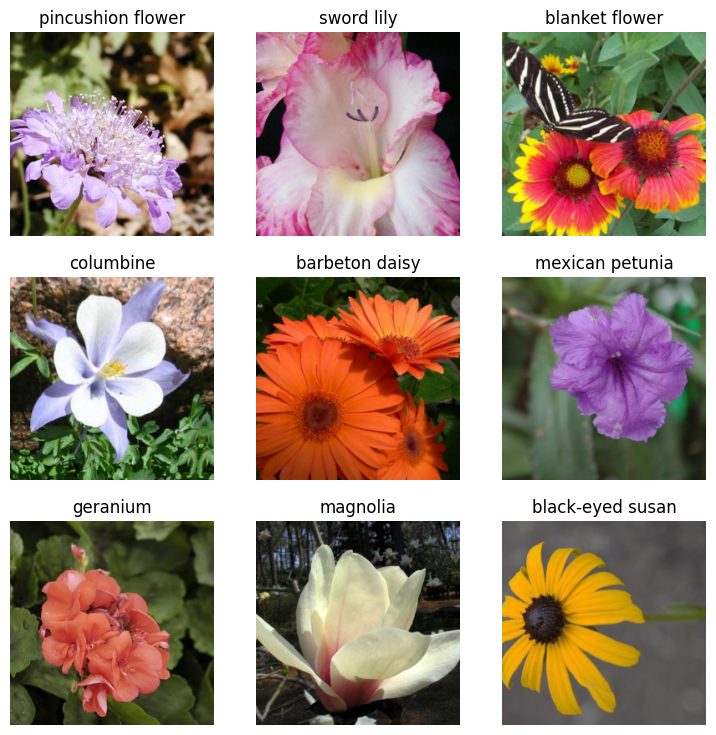

In [12]:
dls = dblock.dataloaders(df)
dls.show_batch()

In [14]:
from torchvision.models import resnet18
learn_resnet18 = vision_learner(dls, resnet18, metrics=error_rate)
learn_resnet18.fine_tune(1)


epoch,train_loss,valid_loss,error_rate,time
0,5.989128,3.553771,0.779412,04:17


epoch,train_loss,valid_loss,error_rate,time
0,3.715719,2.554227,0.568627,05:03


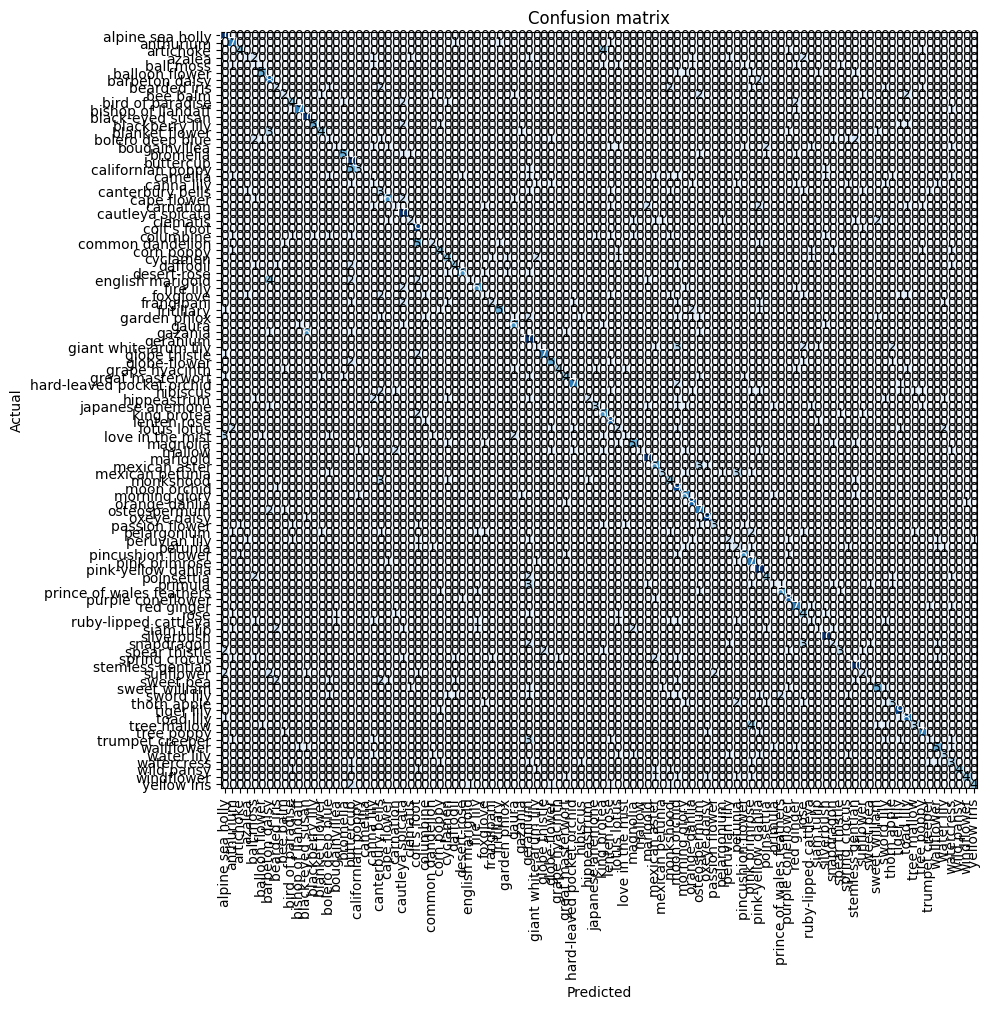

In [15]:
interp_res18 = ClassificationInterpretation.from_learner(learn_resnet18)
interp_res18.plot_confusion_matrix(figsize=(10,10)) 

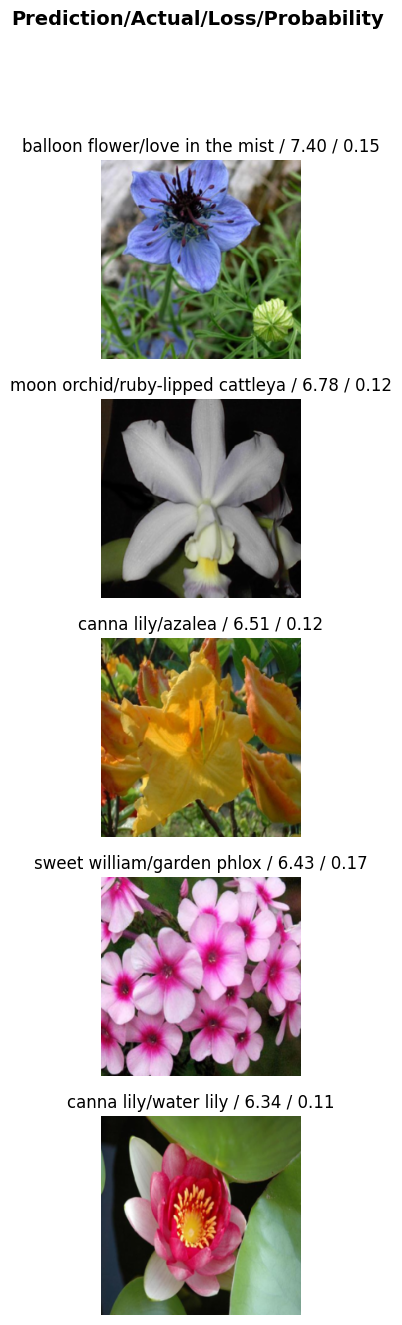

In [16]:
interp_res18.plot_top_losses(5, nrows=5)

In [17]:
# Returns accuracy on validation set
accuracy = 1 - learn_resnet18.validate()[1]
print(f"Validation Accuracy: {accuracy:.2%}")


Validation Accuracy: 43.14%


In [18]:
train_dl = learn_resnet18.dls.train
train_preds, train_targets = learn_resnet18.get_preds(dl=train_dl)
train_acc = (train_preds.argmax(dim=1) == train_targets).float().mean()
print(f"Training Accuracy: {train_acc:.2%}")


Training Accuracy: 64.51%


# Learning with ConvNext

Let's check another model to if changing models can improve the result. Based [on this article](https://www.kaggle.com/code/jhoward/which-image-models-are-best), convnext seems to be a good candidate compared with models registered in pytorch in terms of performance accuracy (x-axis=latency, y-axis=accuracy) with 0.001 sec on latency. The resnet18's accuracy is around 80% while convnext's accuracy was 85%. To learn about ConvNext, please check [this article](https://huggingface.co/docs/transformers/model_doc/convnext). 

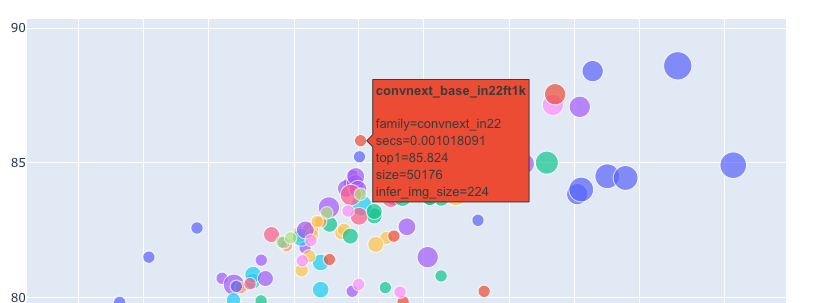

The convnext model that I chose was `convnext_tiny_in22k` in favor of small size model.   

In [19]:
pip install timm


Note: you may need to restart the kernel to use updated packages.


In [13]:
import timm


In [15]:

learn_convnext = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate)
learn_convnext.fine_tune(0)



c:\Users\wiz tech\AppData\Local\Programs\Python\Python313\Lib\site-packages\timm\models\_factory.py:138: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time
0,5.246974,1.361390,0.220588,10:44


At the result for the run, convnext based models showed error rate at 1% vs. 13% by resnet50. The time to generate the model went up from 35s to 1m 19s. However, this convnext's accuracy is promising for high accuracy.  

# Review about generating models

In this experimentation, we have built a pipeline and learn module with the the well-known dataset. Also, tried with two established models, Resnet50 and ConvNext, where ConvNext performed higher than Resnet50. It also demonstrated the process of correcting data as it will be useful for data that didn't go through manual selection process.  

# Deploying to production using Huggingface

At this step, we are preparing the deployment to cloud in this case, Huggingface. In order to deploy, we need a simple UI library, Gradio for prototyping. 
The model file is exported in preparation to be deployed in the cloud.

In [16]:
learn_convnext.export()

path=Path()
path.ls(file_exts='.pkl')

(#2) [Path('export.pkl'),Path('flowerdetector_resnet18.pkl')]

In order to use the exported model file, `load_learner` is called to create an inference object. The inference object also has the access to label vocab to show the prediction value.

In [17]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

c:\Users\wiz tech\AppData\Local\Programs\Python\Python313\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'ball moss', 'balloon flower', 'barbeton daisy', 'bearded iris', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', "colt's foot", 'columbine', 'common dandelion', 'corn poppy', 'cyclamen', 'daffodil', 'desert-rose', 'english marigold', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'japanese anemone', 'king protea', 'lenten rose', 'lotus lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican aster', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'ora